## 6.4 Regression Analysis

### This script contains following steps:

#### 1. Importing libraries and data
#### 2. Subsetting Dataframe
#### 3. Data cleaning and Data Merging
#### 4. Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

### Questions in Indicator Name as survey questions:

df_1: Indicator Name: Intentional homicides, female (per 100,000 female)
- Indicator Code: VC.IHR.PSRC.FE.P5
  
df_2: Indicator Name: There is legislation specifically addressing domestic violence (1=yes; 0=no)
- Indicator Code: SG.LEG.DVAW
            
df_3: Indicator Name: There is legislation on sexual harassment in employment (1=yes; 0=no)
- Indicator Code: SG.LEG.SXHR.EM

### Hypothsis: The existence of legislation against domestic violence decreases the homicide rate.

In [3]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 6/Violence'

In [4]:
# Importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data','Clean Data','EU_Data.pkl'))

### 2. Subsetting dataframe

In [5]:
# Creating subsets for data on intentional homicide
df_1= df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.FE.P5']

In [6]:
# Creating subsets for data on legislation on domestic violence
df_2 = df.loc[df['Indicator Code'] == 'SG.LEG.DVAW']

### 3. Data cleaning and merging subsets

In [8]:
df_1.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [9]:
df_2.head(10)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,EU Region
45161,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2022,1,Southern Europe
45162,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2021,1,Southern Europe
45163,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2020,1,Southern Europe
45164,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2019,1,Southern Europe
45165,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2018,1,Southern Europe
45166,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2017,1,Southern Europe
45167,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2016,1,Southern Europe
45168,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2015,1,Southern Europe
45169,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2014,1,Southern Europe
45170,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2013,1,Southern Europe


In [10]:
# Rename the column Value in df_1
df_1.rename(columns = {'Value' : 'Value Homicide'}, inplace = True)

/var/folders/2m/x4ncpd5d6zn4gz7_m6f16nww0000gn/T/ipykernel_12901/3266789065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Value' : 'Value Homicide'}, inplace = True)


In [11]:
# Rename the column Value in df_2
df_2.rename(columns = {'Value' : 'Value Leg Dom'}, inplace = True)

/var/folders/2m/x4ncpd5d6zn4gz7_m6f16nww0000gn/T/ipykernel_12901/988416985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'Value' : 'Value Leg Dom'}, inplace = True)


In [12]:
df_1.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value Homicide,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [13]:
df_2.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value Leg Dom,EU Region
45161,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2022,1,Southern Europe
45162,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2021,1,Southern Europe
45163,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2020,1,Southern Europe
45164,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2019,1,Southern Europe
45165,There is legislation specifically addressing d...,SG.LEG.DVAW,Albania,ALB,2018,1,Southern Europe


In [14]:
# dropping unnecessary columns in df_1
df_1 = df_1.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code', 'Year'])

In [15]:
# dropping unnecessary columns in df_2
df_2 = df_2.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code', 'Year'])

In [16]:
df_1.head(5)

,Value Homicide,EU Region
10748,0,Southern Europe
10749,0,Southern Europe
10750,0,Southern Europe
10751,1,Southern Europe
10752,0,Southern Europe


In [17]:
df_2.head(5)

,Value Leg Dom,EU Region
45161,1,Southern Europe
45162,1,Southern Europe
45163,1,Southern Europe
45164,1,Southern Europe
45165,1,Southern Europe


In [18]:
#merging df_1 and df_2
df_merged = df_2.merge(df_1, on = 'EU Region')

In [19]:
df_merged

,Value Leg Dom,EU Region,Value Homicide
0,1,Southern Europe,0
1,1,Southern Europe,0
2,1,Southern Europe,0
3,1,Southern Europe,1
4,1,Southern Europe,0
...,...,...,...
177210,1,Northern Europe,0
177211,1,Northern Europe,0
177212,1,Northern Europe,1
177213,1,Northern Europe,1


In [20]:
df_merged.shape

(177215, 3)

In [21]:
# Check for missing values

df_merged.isnull().sum()

# No missing values

Value Leg Dom     0
EU Region         0
Value Homicide    0
dtype: int64

In [22]:
# checking for duplicates
dups = df_merged.duplicated()

In [23]:
dups.shape 
# No dups

(177215,)

In [24]:
# mean of column Value Homicide
df_merged['Value Homicide'].mean() 

0.7349772874756652

In [25]:
# mean of column Value Leg Dom
df_merged['Value Leg Dom'].mean()

0.6829275174223401

### 4. Data preparation for regression analysis 

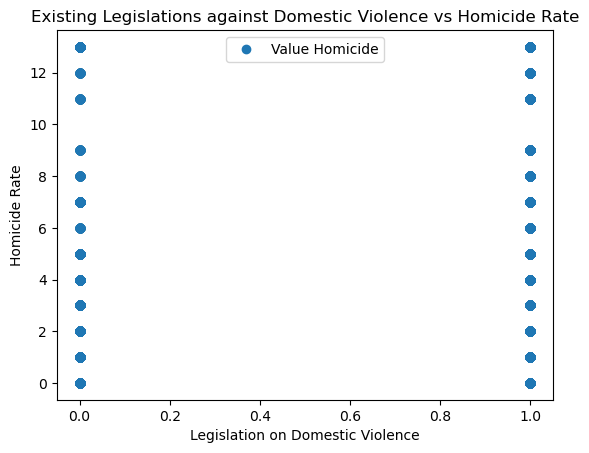

In [26]:
# Creating a scatterplot using matplotlib 
df_merged.plot(x = 'Value Leg Dom', y='Value Homicide',style='o')
plt.title('Existing Legislations against Domestic Violence vs Homicide Rate')  
plt.xlabel('Legislation on Domestic Violence')  
plt.ylabel('Homicide Rate')  
plt.show()

### Based on the scatter plot, I do not think that the data is suitable for a linear regression model.

In [27]:
# Reshaping the variables into NumPy arrays and put them into separate objects
X = df_merged['Value Leg Dom'].values.reshape(-1,1)
y = df_merged['Value Homicide'].values.reshape(-1,1)

In [28]:
X

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [29]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [30]:
# Splitting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [31]:
# Creating a regression object
regression = LinearRegression()  

In [32]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

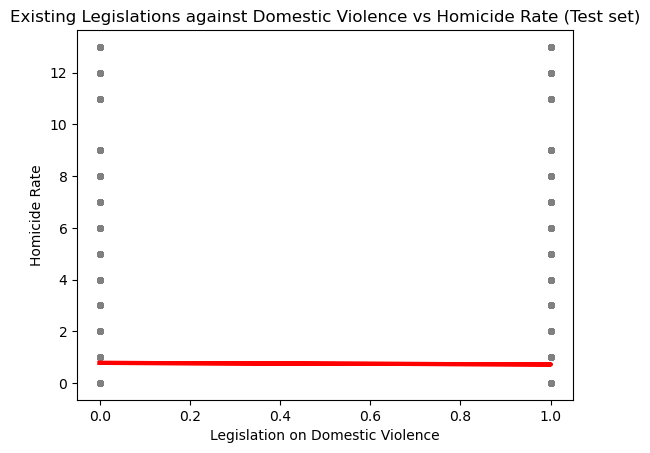

In [34]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Existing Legislations against Domestic Violence vs Homicide Rate (Test set)')
plot_test.xlabel('Legislation on Domestic Violence')
plot_test.ylabel('Homicide Rate')
plot_test.show()

### The red regression line does not cover all the values. Most of the values are far from the line.

In [35]:
# Creating objects that contain the model summary statistics
Model_Sum_Test = mean_squared_error(y_test, y_predicted)
r2_Test = r2_score(y_test, y_predicted)

In [37]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', Model_Sum_Test)
print('R2 score: ', r2_Test)

Slope: [[-0.05936661]]
Mean squared error:  2.5309208259408593
R2 score:  0.00026706547966282024


### A negative slope value (coefficient) that is so close to 0 indicates a slight negative relationship between the variables. That means in rare cases existing legislations against domestic violence may reduce the homicide rate and also that as X rises (existence of legislation against domestic violence), y stays the same (doesn't affect the homicide rate).

### The mean squared error is very high considering how small the values that both variable take (0-1) and (0-13) are. This indicates that the regression line isn’t an accurate representation of the data. 

### r-squared value is almost 0, also meaning that the regression line is a poor fit.

In [38]:
y_predicted

array([[0.77491309],
       [0.71554647],
       [0.77491309],
       ...,
       [0.71554647],
       [0.71554647],
       [0.77491309]])

In [40]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.774913
1,0,0.715546
2,0,0.774913
3,5,0.715546
4,0,0.715546
5,0,0.715546
6,2,0.715546
7,1,0.715546
8,5,0.715546
9,1,0.774913


### The difference between the actual and predicted y values are quite high. This confirms that this model can not determine the relationship between the “existence of legislation on domestic violence” and “the homicide rate” accurately.

In [41]:
# Comparing how the regression fits the training set: Predicting
y_predicted_train = regression.predict(X_train)

In [42]:
Model_Sum_Train = mean_squared_error(y_train, y_predicted_train)
r2_Train = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', Model_Sum_Train)
print('R2 score: ', r2_Train)

Slope: [[-0.05936661]]
Mean squared error:  2.495394530231964
R2 score:  0.00030604360115893403


### Both Train set and Test set show similar results. This means the model is not overfitted! However, it also confirms that the relationship you’re exploring isn’t purely linear.

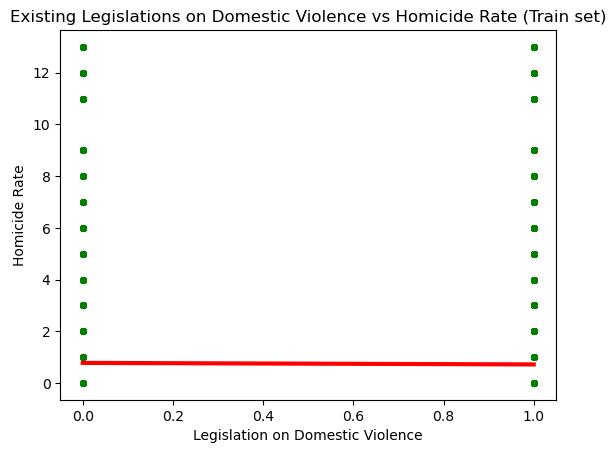

In [44]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Existing Legislations on Domestic Violence vs Homicide Rate (Train set)')
plot_test.xlabel('Legislation on Domestic Violence')
plot_test.ylabel('Homicide Rate')
plot_test.show()

### Both Train set and Test set show similar results. This means the model is not overfitted!

### Conclusion: Our hypothsis (The existence of legislation against domestic violence decreases the homicide rate) does not accurately represent the data. There are probably other variables that play a more significant role whether a country has higher homicide rates. 